In [26]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [2]:
# Load the nou_hearings

nou_hearings = pd.read_csv('../../dataset/nou_hearings_full.csv')

# Sample of the data

nou_hearings_sample = nou_hearings.sample(10)
nou_hearings_sample

,actor,paragraph,date
2374,Norsk Bonde- og Småbrukarlag,Ikke fører til økt import. Ikke påfører bonde...,28.02.2024
1837,Norsk institutt for vannforskning (NIVA),Tiltak mot forurensning er også klimatiltak. M...,28.02.2024
2243,Redd Barna,Den generelle kommentaren er av stor betydning...,29.01.2024
1193,Aurskog-Høland kommune,Omstilling til et lavutslippssamfunn forutsett...,29.02.2024
1987,Offshore Norge,Dersom man skal følge anbefalingen fra utvalge...,16.01.2024
1550,Miljømerking Norge,Svanemerket er svært opptatt av kjemikalier i ...,28.02.2024
1223,Avinor,Bærekraftig flydrivstoff (Sustainable Aviation...,26.01.2024
1111,Akershus fylkeskommune,Man må gjennomgående ha et bevisst forhold til...,20.02.2024
3062,Yrkesorganisasjonenes Sentralforbund (YS),"Med vennlig hilsen, Yrkesorganisasjonenes Sent...",31.01.2024
2550,Trøndelag fylkeskommune,Det må være en kost/nytte vurdering av alle kl...,01.03.2024


In [19]:

import token


nlp = spacy.load('nb_core_news_md')

# Tokenize the text
def preprocess_text(text):
    
    doc = nlp(text.lower())
    tokens = [token.text for token in doc]
    return tokens


nlp = spacy.load('nb_core_news_md')


tokenized_docs = [preprocess_text(doc) for doc in nou_hearings_sample["paragraph"]]

tagged_docs = [TaggedDocument(words=doc, tags=[str(i)]) for i, doc in enumerate(tokenized_docs)]

model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=40)
model.build_vocab(tagged_docs)
model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)

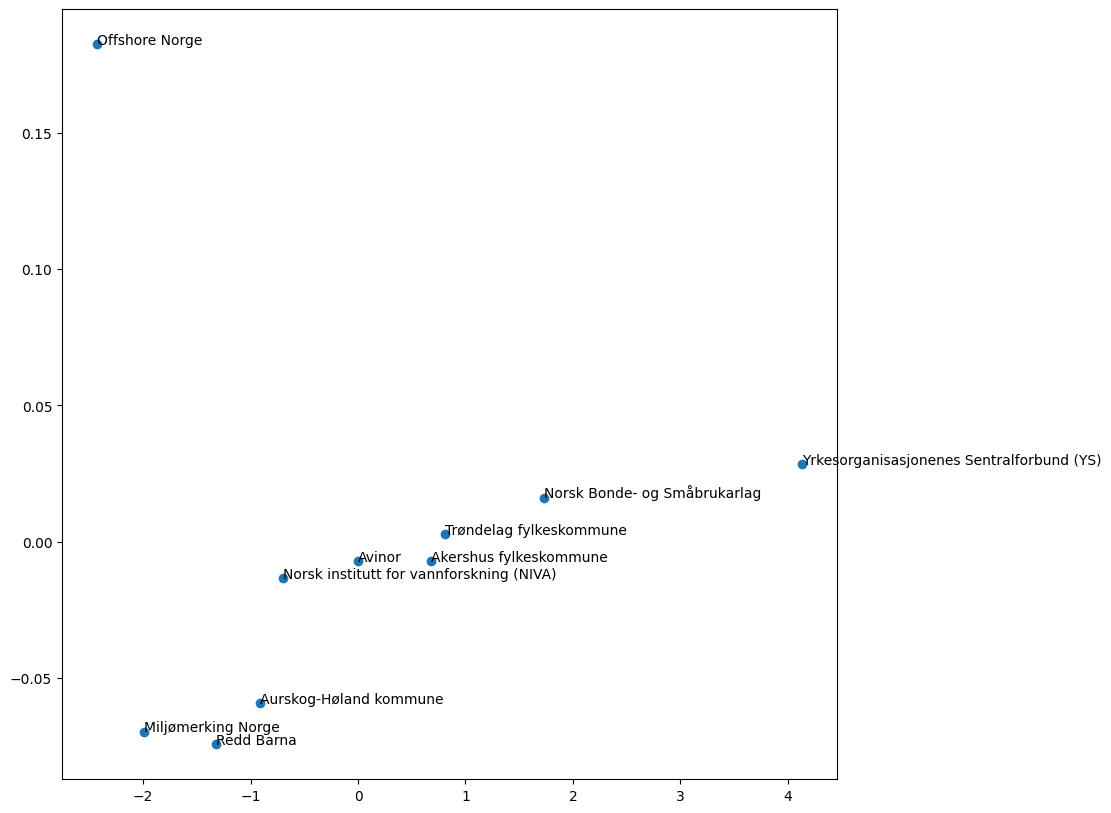

In [31]:
# Visualize the embeddings

doc_vectors = [model.infer_vector(doc) for doc in tokenized_docs]

pca = PCA(n_components=2)
doc_vec_2d = pca.fit_transform(doc_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(doc_vec_2d[:, 0], doc_vec_2d[:, 1])

for i, actor in enumerate(nou_hearings_sample["actor"]):
    plt.annotate(actor, (doc_vec_2d[i, 0], doc_vec_2d[i, 1]))